In [1]:
print("Bioinformatics project is ready!")


Bioinformatics project is ready!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded")


Libraries loaded


In [3]:
# 2. WCZYTANIE DANYCH - sprawdzamy strukturę
file_path = 'GSE70947_series_matrix.txt/GSE70947_series_matrix.txt'

# Sprawdźmy pierwsze linie pliku
with open(file_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        print(f"Linia {i}: {line[:120]}")
        if i > 35:  # pokaż pierwsze 35 linii
            break

Linia 0: !Series_title	"Age and estrogen-dependent inflammation in breast adenocarcinoma and normal breast tissue [cohort_2]"

Linia 1: !Series_geo_accession	"GSE70947"

Linia 2: !Series_status	"Public on Jul 01 2016"

Linia 3: !Series_submission_date	"Jul 15 2015"

Linia 4: !Series_last_update_date	"Nov 27 2018"

Linia 5: !Series_summary	"Chronic inflammation promotes breast tumor growth and invasion by accelerating angiogenesis and tissue 
Linia 6: !Series_overall_design	"296 total samples: 148 breast adenocarcinoma, 148 paired adjacent normal breast tissue"

Linia 7: !Series_type	"Expression profiling by array"

Linia 8: !Series_contributor	"David,A,Quigley"

Linia 9: !Series_contributor	"Vessela,,Kristensen"

Linia 10: !Series_sample_id	"GSM1823702 GSM1823703 GSM1823704 GSM1823705 GSM1823706 GSM1823707 GSM1823708 GSM1823709 GSM1823710 GS
Linia 11: !Series_contact_name	"David,,Quigley"

Linia 12: !Series_contact_laboratory	"Ashworth Lab"

Linia 13: !Series_contact_department	"Helen 

In [4]:
# 3. Szukamy gdzie zaczynają się dane ekspresji
file_path = 'GSE70947_series_matrix.txt/GSE70947_series_matrix.txt'

with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Znajdźmy linię z "!series_matrix_table_begin"
for i, line in enumerate(lines):
    if 'series_matrix_table_begin' in line.lower():
        print(f"Dane zaczynają się w linii {i}")
        # Pokaż kilka linii wokół
        for j in range(i, min(i+10, len(lines))):
            print(f"Linia {j}: {lines[j][:120]}")
        break
        

Dane zaczynają się w linii 67
Linia 67: !series_matrix_table_begin

Linia 68: "ID_REF"	"GSM1823702"	"GSM1823703"	"GSM1823704"	"GSM1823705"	"GSM1823706"	"GSM1823707"	"GSM1823708"	"GSM1823709"	"GSM182
Linia 69: 1			15.684	15.283	15.535	15.106	15.321		15.761	16.828	15.982		15.989	16.126	14.758			15.922		15.756			15.892	15.55		15.6
Linia 70: 2			5.196	4.458		4.127	5.629		4.15	3.676	4.677		4.705	4.155	5.549			4.76		6.405			4.588	4.293		3.926	3.754	4.092	4.306	4
Linia 71: 3			5.167	3.173		4.178	4.665		4.209	2.936	4.043		5.044	3.931	4.714			4.658		6.889			4.466	4.654		3.926	4.116	4.478	4.391
Linia 72: 4		9.387	8.958	9.035		9.188	9.326		9.298	8.042	9.046		9.16	9.118	9.017			9.517		9.003			8.624	8.705		8.996	8.781	9.021	8
Linia 73: 5		7.125	7.993	7.856		8.042	7.653		7.356	7.259	7.563		7.383	7.188	7.51			7.917		7.74		7.819	7.407	7.319		7.66	7.243	7.33
Linia 74: 6		7.033	6.359	6.261		6.388	6.99		7.04	6.47	6.837		6.777	6.884	7.273			5.917		7.953		6.546	6.487	6.307		5.805	5.714	5.94
Linia 75: 7		10

In [5]:
# 4. WCZYTANIE DANYCH EKSPRESJI - poprawione
file_path = 'GSE70947_series_matrix.txt/GSE70947_series_matrix.txt'

# Wczytujemy bez index_col, potem go ustawimy
data = pd.read_csv(file_path, sep='\t', skiprows=67, low_memory=False)

# Usuńmy linię z końcem tabeli (jeśli istnieje)
data = data[~data.iloc[:, 0].astype(str).str.contains('series_matrix_table_end')]

# Pierwsza kolumna to ID genów
data = data.set_index(data.columns[0])
data.index.name = 'Gene_ID'

# Konwertujemy na liczby (niektóre wartości mogą być puste)
data = data.apply(pd.to_numeric, errors='coerce')

print("✓ Dane wczytane!")
print(f"\nWymiary danych: {data.shape}")
print(f"  - Liczba genów: {data.shape[0]}")
print(f"  - Liczba próbek: {data.shape[1]}")

print("\nPierwsze 5 wierszy i 5 kolumn:")
print(data.iloc[:5, :5])

print("\nNazwy kilku pierwszych próbek:")
print(data.columns[:10].tolist())

✓ Dane wczytane!

Wymiary danych: (62978, 0)
  - Liczba genów: 62978
  - Liczba próbek: 0

Pierwsze 5 wierszy i 5 kolumn:
Empty DataFrame
Columns: []
Index: [GSM1823997, nan, nan, nan, nan]

Nazwy kilku pierwszych próbek:
[]


In [6]:
# 5. Debugowanie - sprawdźmy dokładnie jak wyglądają dane
file_path = 'GSE70947_series_matrix.txt/GSE70947_series_matrix.txt'

# Wczytajmy surowo
data_raw = pd.read_csv(file_path, sep='\t', skiprows=67, nrows=10, low_memory=False)

print("Kolumny w pliku:")
print(data_raw.columns.tolist())

print("\nPierwsze 3 wiersze (surowe):")
print(data_raw.head(3))

print("\nKształt:")
print(data_raw.shape)

Kolumny w pliku:
['!series_matrix_table_begin']

Pierwsze 3 wiersze (surowe):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [7]:
# 6. Wczytanie z odpowiednim separatorem
file_path = 'GSE70947_series_matrix.txt/GSE70947_series_matrix.txt'

# Używamy silnika python i regex dla wielu spacji/tabów
data = pd.read_csv(file_path, 
                   sep=r'\s+',  # wiele białych znaków (spacje/taby)
                   skiprows=68,  # pomijamy metadane + linię "!series_matrix_table_begin"
                   engine='python')

print("✓ Dane wczytane!")
print(f"\nWymiary danych: {data.shape}")
print(f"  - Liczba genów: {data.shape[0]}")
print(f"  - Liczba próbek: {data.shape[1]}")

print("\nPierwsze 5 kolumn:")
print(data.columns[:5].tolist())

print("\nPierwsze 3 wiersze i 5 kolumn:")
print(data.iloc[:3, :5])

✓ Dane wczytane!

Wymiary danych: (62977, 297)
  - Liczba genów: 62977
  - Liczba próbek: 297

Pierwsze 5 kolumn:
['"ID_REF"', '"GSM1823702"', '"GSM1823703"', '"GSM1823704"', '"GSM1823705"']

Pierwsze 3 wiersze i 5 kolumn:
  "ID_REF"  "GSM1823702"  "GSM1823703"  "GSM1823704"  "GSM1823705"
0        1        15.684        15.283        15.535        15.106
1        2         5.196         4.458         4.127         5.629
2        3         5.167         3.173         4.178         4.665


In [8]:
# 7a. Sprawdźmy nazwy kolumn
print("Nazwy kolumn:")
print(data.columns.tolist()[:10])  # pierwsze 10

print("\nPierwsza kolumna to:")
print(data.columns[0])

print("\nPierwsze 3 wiersze całej ramki:")
print(data.head(3))

Nazwy kolumn:
['"ID_REF"', '"GSM1823702"', '"GSM1823703"', '"GSM1823704"', '"GSM1823705"', '"GSM1823706"', '"GSM1823707"', '"GSM1823708"', '"GSM1823709"', '"GSM1823710"']

Pierwsza kolumna to:
"ID_REF"

Pierwsze 3 wiersze całej ramki:
  "ID_REF"  "GSM1823702"  "GSM1823703"  "GSM1823704"  "GSM1823705"  \
0        1        15.684        15.283        15.535        15.106   
1        2         5.196         4.458         4.127         5.629   
2        3         5.167         3.173         4.178         4.665   

   "GSM1823706"  "GSM1823707"  "GSM1823708"  "GSM1823709"  "GSM1823710"  ...  \
0        15.321        15.761        16.828        15.982        15.989  ...   
1         4.150         3.676         4.677         4.705         4.155  ...   
2         4.209         2.936         4.043         5.044         3.931  ...   

   "GSM1823988"  "GSM1823989"  "GSM1823990"  "GSM1823991"  "GSM1823992"  \
0           NaN           NaN           NaN           NaN           NaN   
1           N

In [9]:
# 7. PRZYGOTOWANIE DANYCH - poprawione

# Usuńmy cudzysłowy z nazw kolumn
data.columns = data.columns.str.replace('"', '')

# Ustawmy pierwszą kolumnę jako indeks
data = data.set_index('ID_REF')
data.index.name = 'Gene_ID'

# Usuńmy linię z końcem tabeli (jeśli istnieje)
data = data[~data.index.astype(str).str.contains('series_matrix_table_end', na=False)]

# Konwertujemy wszystko na liczby
data = data.apply(pd.to_numeric, errors='coerce')

print("✓ Dane przygotowane!")
print(f"\nWymiary: {data.shape}")
print(f"  - Liczba genów: {data.shape[0]}")
print(f"  - Liczba próbek: {data.shape[1]}")

# Sprawdźmy czy są braki danych
print(f"\nBraki danych:")
print(f"  - Łącznie: {data.isna().sum().sum()}")
print(f"  - % braków: {(data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100):.2f}%")

print("\nPierwsze 3 wiersze i 5 kolumn:")
print(data.iloc[:3, :5])

✓ Dane przygotowane!

Wymiary: (62976, 296)
  - Liczba genów: 62976
  - Liczba próbek: 296

Braki danych:
  - Łącznie: 729494
  - % braków: 3.91%

Pierwsze 3 wiersze i 5 kolumn:
         GSM1823702  GSM1823703  GSM1823704  GSM1823705  GSM1823706
Gene_ID                                                            
1            15.684      15.283      15.535      15.106      15.321
2             5.196       4.458       4.127       5.629       4.150
3             5.167       3.173       4.178       4.665       4.209


In [10]:
# 8. INFORMACJE O PRÓBKACH (metadata)

# Musimy wrócić do początku pliku i wyciągnąć informacje o typie próbek
# Szukamy linii z "Sample_title" - tam są nazwy typu "CM016-normal" lub "CM016-tumor"

file_path = 'GSE70947_series_matrix.txt/GSE70947_series_matrix.txt'

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        if '!Sample_title' in line:
            # Ta linia zawiera nazwy próbek
            sample_names = line.strip().split('\t')[1:]  # pomijamy pierwszy element "!Sample_title"
            break

# Usuńmy cudzysłowy
sample_names = [s.strip('"') for s in sample_names]

print(f"Liczba nazw próbek: {len(sample_names)}")
print(f"\nPierwsze 10 nazw:")
for i, name in enumerate(sample_names[:10]):
    print(f"  {i+1}. {name}")

# Sprawdźmy ile jest tumor i normal
tumor_count = sum('tumor' in name.lower() for name in sample_names)
normal_count = sum('normal' in name.lower() for name in sample_names)

print(f"\n✓ Znaleziono:")
print(f"  - Tumor: {tumor_count}")
print(f"  - Normal: {normal_count}")

Liczba nazw próbek: 296

Pierwsze 10 nazw:
  1. CM016-normal
  2. CM022-normal
  3. CM082-normal
  4. CM093-normal
  5. CM096-normal
  6. CM099-normal
  7. CM101-normal
  8. CM103-normal
  9. CM106-normal
  10. CM113-normal

✓ Znaleziono:
  - Tumor: 148
  - Normal: 148


In [11]:
# 9. TWORZENIE METADANYCH

# Stwórzmy DataFrame z informacjami o próbkach
metadata = pd.DataFrame({
    'Sample_ID': data.columns,
    'Sample_Name': sample_names,
    'Type': ['Tumor' if 'tumor' in name.lower() else 'Normal' for name in sample_names]
})

print("✓ Metadata utworzone!")
print(f"\nWymiary metadata: {metadata.shape}")
print("\nPierwsze 5 wierszy:")
print(metadata.head())

print("\nOstatnie 5 wierszy:")
print(metadata.tail())

print("\nPodsumowanie:")
print(metadata['Type'].value_counts())

# Sprawdźmy czy liczba próbek się zgadza
print(f"\n✓ Zgadza się: {len(metadata) == data.shape[1]}")

✓ Metadata utworzone!

Wymiary metadata: (296, 3)

Pierwsze 5 wierszy:
    Sample_ID   Sample_Name    Type
0  GSM1823702  CM016-normal  Normal
1  GSM1823703  CM022-normal  Normal
2  GSM1823704  CM082-normal  Normal
3  GSM1823705  CM093-normal  Normal
4  GSM1823706  CM096-normal  Normal

Ostatnie 5 wierszy:
      Sample_ID  Sample_Name   Type
291  GSM1823993  CMG56-tumor  Tumor
292  GSM1823994  CMG57-tumor  Tumor
293  GSM1823995  CMG58-tumor  Tumor
294  GSM1823996  CMG59-tumor  Tumor
295  GSM1823997  CMG63-tumor  Tumor

Podsumowanie:
Type
Normal    148
Tumor     148
Name: count, dtype: int64

✓ Zgadza się: True


In [12]:
# 10. CZYSZCZENIE DANYCH

print(f"Przed czyszczeniem: {data.shape[0]} genów")

# Usuńmy geny, które mają więcej niż 50% braków danych
threshold = 0.5 * data.shape[1]  # 50% próbek
data_clean = data.dropna(thresh=threshold)

print(f"Po czyszczeniu: {data_clean.shape[0]} genów")
print(f"Usunięto: {data.shape[0] - data_clean.shape[0]} genów")

# Dla pozostałych braków - wypełnijmy medianą dla każdego genu
data_clean = data_clean.fillna(data_clean.median(axis=1))

print(f"\n✓ Dane oczyszczone!")
print(f"Wymiary finalne: {data_clean.shape}")
print(f"Braki danych: {data_clean.isna().sum().sum()}")

# Podstawowe statystyki
print("\nPodstawowe statystyki ekspresji genów:")
print(data_clean.describe().iloc[:, :5])  # pierwsze 5 próbek

Przed czyszczeniem: 62976 genów
Po czyszczeniu: 62175 genów
Usunięto: 801 genów

✓ Dane oczyszczone!
Wymiary finalne: (62175, 296)
Braki danych: 596137

Podstawowe statystyki ekspresji genów:
         GSM1823702    GSM1823703    GSM1823704    GSM1823705    GSM1823706
count  62175.000000  62175.000000  62175.000000  62175.000000  62175.000000
mean       7.382337      7.383029      7.377406      7.386929      7.393456
std        2.966592      2.959415      2.970907      2.961898      2.958238
min       -1.440000     -1.083000     -1.440000     -1.251000     -0.622000
25%        4.861000      4.853000      4.838000      4.841000      4.881000
50%        6.854000      6.851000      6.841000      6.855000      6.859000
75%        9.513000      9.506500      9.516000      9.511000      9.516000
max       18.441000     18.441000     18.441000     18.441000     18.441000


In [13]:
# 11a. Sprawdzenie i usunięcie braków przed PCA

print("Sprawdzam braki danych...")
print(f"Braki w data_clean: {data_clean.isna().sum().sum()}")

# Jeśli są braki, usuńmy geny które je mają
if data_clean.isna().sum().sum() > 0:
    print("\nUsuwam geny z brakami...")
    data_clean = data_clean.dropna()
    print(f"Po usunięciu: {data_clean.shape[0]} genów")

print(f"\n✓ Finalne wymiary: {data_clean.shape}")
print(f"✓ Braki danych: {data_clean.isna().sum().sum()}")

Sprawdzam braki danych...
Braki w data_clean: 596137

Usuwam geny z brakami...
Po usunięciu: 9356 genów

✓ Finalne wymiary: (9356, 296)
✓ Braki danych: 0


✓ PCA wykonane!

Wyjaśniona wariancja:
  PC1: 14.16%
  PC2: 7.62%
  Razem: 21.78%

✓ Wykres zapisany: figures/pca.png


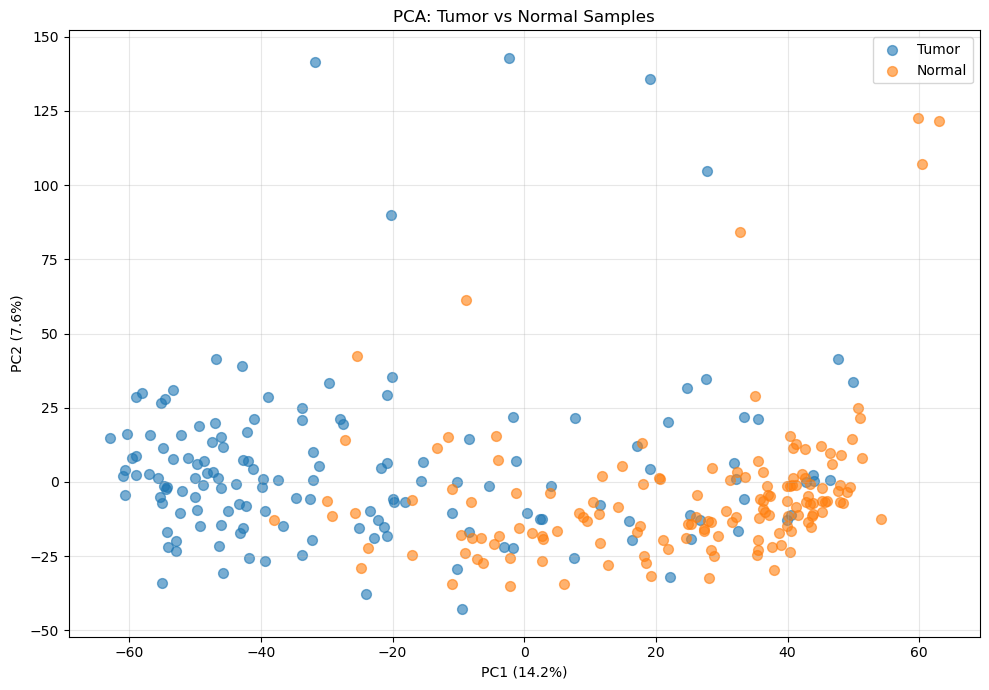

In [14]:
# 11. PCA - Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Transpozycja - chcemy próbki jako wiersze, geny jako kolumny
data_t = data_clean.T

# Standaryzacja (ważne dla PCA!)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_t)

# PCA
pca = PCA(n_components=2)
pca_result = pd.DataFrame(
    pca.fit_transform(data_scaled),
    columns=['PC1', 'PC2'],
    index=data_t.index
)

# Dodajemy informację o typie (Tumor/Normal)
pca_result['Type'] = metadata['Type'].values

print("✓ PCA wykonane!")
print(f"\nWyjaśniona wariancja:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Razem: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# WIZUALIZACJA PCA
plt.figure(figsize=(10, 7))

for sample_type in ['Tumor', 'Normal']:
    mask = pca_result['Type'] == sample_type
    plt.scatter(
        pca_result.loc[mask, 'PC1'],
        pca_result.loc[mask, 'PC2'],
        label=sample_type,
        alpha=0.6,
        s=50
    )

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA: Tumor vs Normal Samples')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Zapisz wykres
plt.savefig('../figures/pca.png', dpi=300, bbox_inches='tight')
print("\n✓ Wykres zapisany: figures/pca.png")

plt.show()

In [15]:
# 12. ANALIZA RÓŻNICOWEJ EKSPRESJI GENÓW

from scipy.stats import ttest_ind

# Pobieramy indeksy próbek tumor i normal
tumor_samples = metadata[metadata['Type'] == 'Tumor']['Sample_ID'].values
normal_samples = metadata[metadata['Type'] == 'Normal']['Sample_ID'].values

print(f"Tumor próbek: {len(tumor_samples)}")
print(f"Normal próbek: {len(normal_samples)}")

# Dla każdego genu robimy t-test
results = []

for gene_id in data_clean.index:
    # Wartości ekspresji dla tumor i normal
    tumor_expr = data_clean.loc[gene_id, tumor_samples].values
    normal_expr = data_clean.loc[gene_id, normal_samples].values
    
    # t-test
    t_stat, p_value = ttest_ind(tumor_expr, normal_expr, nan_policy='omit')
    
    # Średnie ekspresje
    tumor_mean = np.mean(tumor_expr)
    normal_mean = np.mean(normal_expr)
    
    # Log2 Fold Change
    log2fc = np.log2(tumor_mean + 1) - np.log2(normal_mean + 1)
    
    results.append({
        'Gene_ID': gene_id,
        'Tumor_Mean': tumor_mean,
        'Normal_Mean': normal_mean,
        'Log2FC': log2fc,
        'P_value': p_value,
        'T_stat': t_stat
    })

# DataFrame z wynikami
diff_expr = pd.DataFrame(results)

# Sortuj po p-value
diff_expr = diff_expr.sort_values('P_value')

print("\n✓ Analiza wykonana!")
print(f"Liczba testowanych genów: {len(diff_expr)}")

print("\nTop 10 genów z najmniejszą p-value:")
print(diff_expr.head(10)[['Gene_ID', 'Log2FC', 'P_value']])

Tumor próbek: 148
Normal próbek: 148

✓ Analiza wykonana!
Liczba testowanych genów: 9356

Top 10 genów z najmniejszą p-value:
     Gene_ID    Log2FC       P_value
8363   54725  0.288252  4.866728e-47
849    11265  0.508121  7.021944e-45
673     9674  0.146859  2.971869e-41
8677   56171  0.461863  3.967489e-41
1224   16019  0.471856  6.996856e-41
8872   57269  0.337173  1.576825e-40
3186   24670  0.211217  5.593489e-40
1811   19118  0.278577  7.500017e-40
4561   31926  0.372089  8.758331e-40
6643   42354  0.443037  9.761489e-40


✓ Wykres zapisany: figures/volcano_plot.png


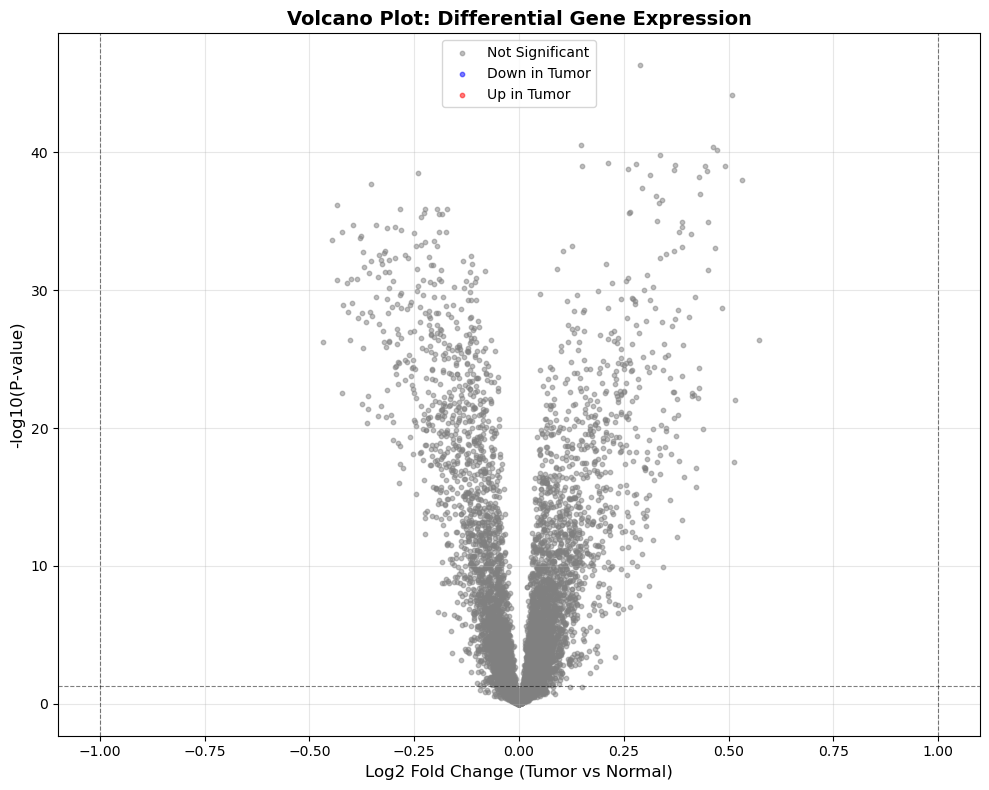


✓ Podsumowanie:
Significant
Not Significant    9356
Name: count, dtype: int64


In [16]:
# 13. VOLCANO PLOT

# Dodajemy -log10(p-value) do lepszej wizualizacji
diff_expr['-log10(P)'] = -np.log10(diff_expr['P_value'])

# Threshold dla istotnych genów
p_threshold = 0.05
fc_threshold = 1.0  # Log2FC > 1 lub < -1

# Klasyfikacja genów
diff_expr['Significant'] = 'Not Significant'
diff_expr.loc[(diff_expr['P_value'] < p_threshold) & (diff_expr['Log2FC'] > fc_threshold), 'Significant'] = 'Up in Tumor'
diff_expr.loc[(diff_expr['P_value'] < p_threshold) & (diff_expr['Log2FC'] < -fc_threshold), 'Significant'] = 'Down in Tumor'

# WYKRES
plt.figure(figsize=(10, 8))

colors = {'Not Significant': 'gray', 'Up in Tumor': 'red', 'Down in Tumor': 'blue'}

for sig_type in ['Not Significant', 'Down in Tumor', 'Up in Tumor']:
    subset = diff_expr[diff_expr['Significant'] == sig_type]
    plt.scatter(subset['Log2FC'], subset['-log10(P)'], 
                c=colors[sig_type], label=sig_type, alpha=0.5, s=10)

# Linie progowe
plt.axhline(-np.log10(p_threshold), color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(fc_threshold, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(-fc_threshold, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xlabel('Log2 Fold Change (Tumor vs Normal)', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.title('Volcano Plot: Differential Gene Expression', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Zapisz
plt.savefig('../figures/volcano_plot.png', dpi=300, bbox_inches='tight')
print("✓ Wykres zapisany: figures/volcano_plot.png")

plt.show()

# Podsumowanie
print(f"\n✓ Podsumowanie:")
print(diff_expr['Significant'].value_counts())

✓ Wybrano top 50 genów
Wymiary heatmap_data: (50, 296)
Wymiary po normalizacji: (50, 296)
Wymiary posortowane: (50, 296)

✓ Wykres zapisany: figures/heatmap.png


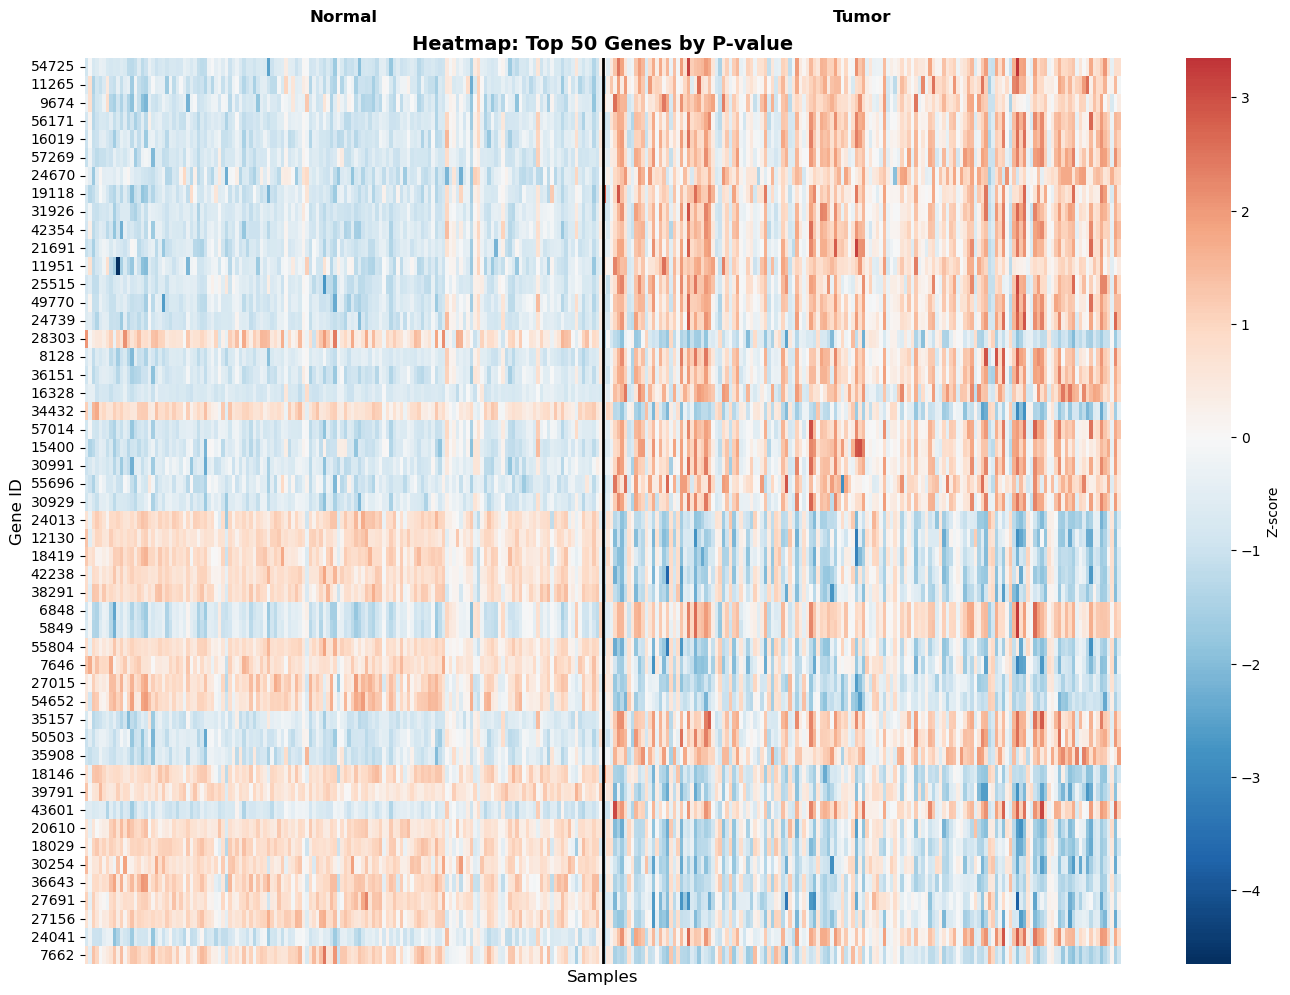

In [17]:
# 14b. POPRAWIONA HEATMAP

# Top 50 genów
top_genes = diff_expr.head(50)
print(f"✓ Wybrano top 50 genów")

# Pobieranie danych ekspresji dla tych genów
heatmap_data = data_clean.loc[top_genes['Gene_ID']]

print(f"Wymiary heatmap_data: {heatmap_data.shape}")

# Normalizacja Z-score (dla każdego genu - po wierszach)
from scipy.stats import zscore
heatmap_data_scaled = heatmap_data.T.apply(zscore).T  # Transpozycja -> zscore -> transpozycja z powrotem

print(f"Wymiary po normalizacji: {heatmap_data_scaled.shape}")


normal_cols = metadata[metadata['Type'] == 'Normal']['Sample_ID'].values
tumor_cols = metadata[metadata['Type'] == 'Tumor']['Sample_ID'].values


normal_cols = [col for col in normal_cols if col in heatmap_data_scaled.columns]
tumor_cols = [col for col in tumor_cols if col in heatmap_data_scaled.columns]

heatmap_data_sorted = heatmap_data_scaled[list(normal_cols) + list(tumor_cols)]

print(f"Wymiary posortowane: {heatmap_data_sorted.shape}")

# HEATMAP
plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data_sorted, 
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Z-score'},
            xticklabels=False,
            yticklabels=True,
            linewidths=0)

plt.axvline(x=len(normal_cols), color='black', linewidth=2)
plt.text(len(normal_cols)/2, -2, 'Normal', ha='center', fontsize=12, fontweight='bold')
plt.text(len(normal_cols) + len(tumor_cols)/2, -2, 'Tumor', ha='center', fontsize=12, fontweight='bold')

plt.title('Heatmap: Top 50 Genes by P-value', fontsize=14, fontweight='bold')
plt.ylabel('Gene ID', fontsize=12)
plt.xlabel('Samples', fontsize=12)
plt.tight_layout()

plt.savefig('../figures/heatmap.png', dpi=300, bbox_inches='tight')
print("\n✓ Wykres zapisany: figures/heatmap.png")

plt.show()

✓ Wybrano top 50 genów
Wymiary heatmap_data: (50, 296)
Wymiary po normalizacji: (50, 296)
Wymiary posortowane: (50, 296)

✓ Wykres zapisany: figures/heatmap.png


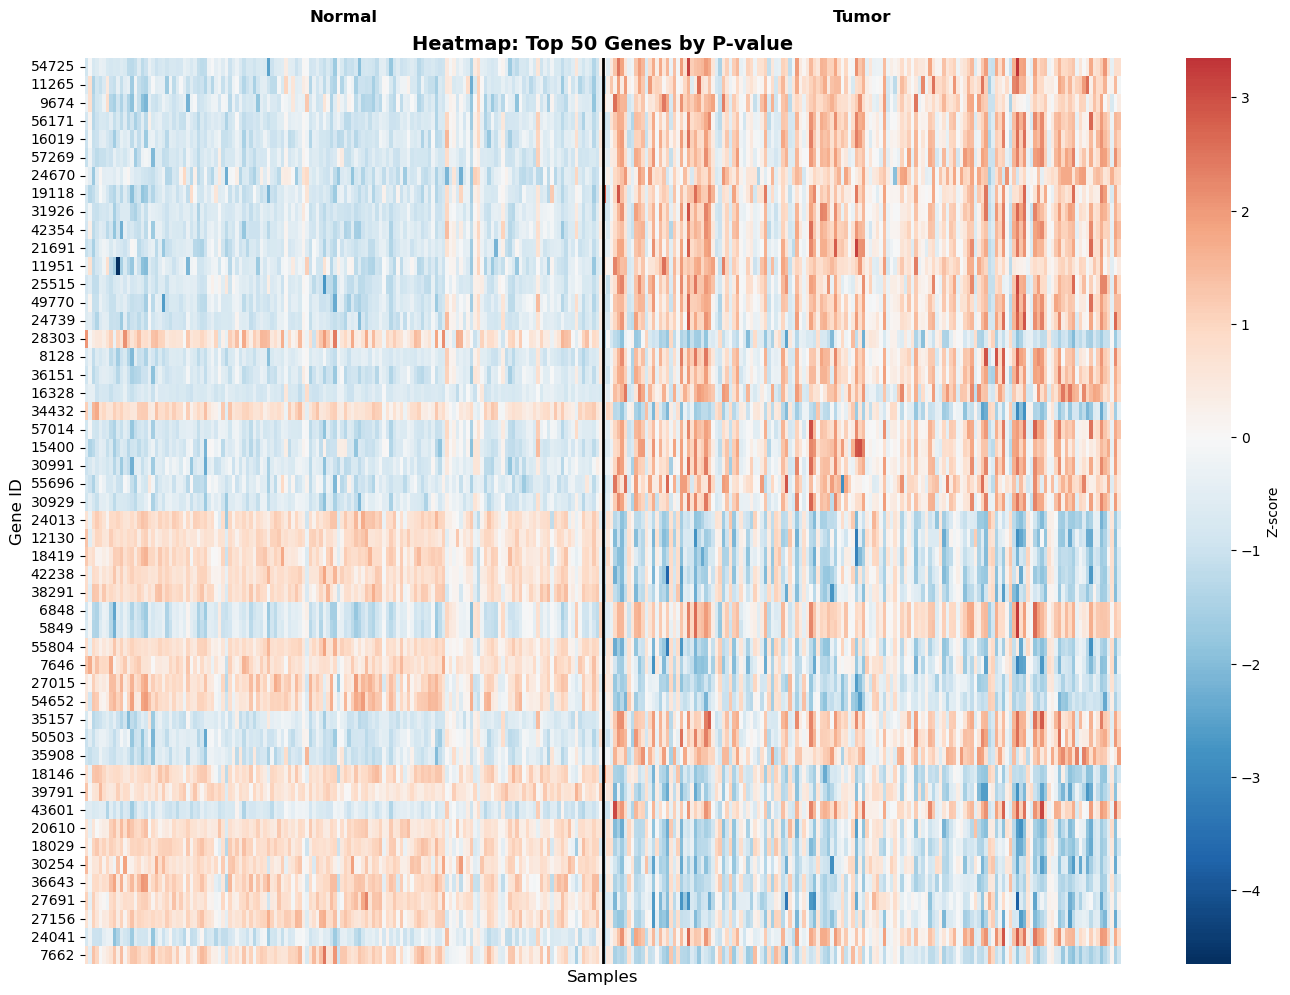

In [18]:
# 14b. POPRAWIONA HEATMAP

# Top 50 genów
top_genes = diff_expr.head(50)
print(f"✓ Wybrano top 50 genów")

# Pobieranie danych ekspresji dla tych genów
heatmap_data = data_clean.loc[top_genes['Gene_ID']]

print(f"Wymiary heatmap_data: {heatmap_data.shape}")

# Normalizacja Z-score 
from scipy.stats import zscore
heatmap_data_scaled = heatmap_data.T.apply(zscore).T  # Transpozycja -> zscore -> transpozycja z powrotem

print(f"Wymiary po normalizacji: {heatmap_data_scaled.shape}")


normal_cols = metadata[metadata['Type'] == 'Normal']['Sample_ID'].values
tumor_cols = metadata[metadata['Type'] == 'Tumor']['Sample_ID'].values

normal_cols = [col for col in normal_cols if col in heatmap_data_scaled.columns]
tumor_cols = [col for col in tumor_cols if col in heatmap_data_scaled.columns]

heatmap_data_sorted = heatmap_data_scaled[list(normal_cols) + list(tumor_cols)]

print(f"Wymiary posortowane: {heatmap_data_sorted.shape}")

# HEATMAP
plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data_sorted, 
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Z-score'},
            xticklabels=False,
            yticklabels=True,
            linewidths=0)

plt.axvline(x=len(normal_cols), color='black', linewidth=2)
plt.text(len(normal_cols)/2, -2, 'Normal', ha='center', fontsize=12, fontweight='bold')
plt.text(len(normal_cols) + len(tumor_cols)/2, -2, 'Tumor', ha='center', fontsize=12, fontweight='bold')

plt.title('Heatmap: Top 50 Genes by P-value', fontsize=14, fontweight='bold')
plt.ylabel('Gene ID', fontsize=12)
plt.xlabel('Samples', fontsize=12)
plt.tight_layout()

plt.savefig('../figures/heatmap.png', dpi=300, bbox_inches='tight')
print("\n✓ Wykres zapisany: figures/heatmap.png")

plt.show()

In [19]:
# 16. GENEROWANIE README.md

readme_content = """# Breast Cancer Gene Expression Analysis

## Project Overview
Differential gene expression analysis comparing tumor and normal breast tissue samples using publicly available microarray data from GEO (GSE70947).

## Dataset
- **Source**: [GEO GSE70947](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE70947)
- **Study**: Age and estrogen-dependent inflammation in breast adenocarcinoma
- **Samples**: 296 total (148 tumor + 148 adjacent normal tissue)
- **Platform**: Microarray gene expression profiling
- **Genes analyzed**: {genes} (after quality control)

## Methods

### Data Processing
1. Downloaded series matrix file from GEO
2. Quality control: removed genes with >50% missing values
3. Imputation: filled remaining missing values with gene-wise median
4. Normalization: standardized for PCA analysis, Z-score for heatmap

### Statistical Analysis
- **Differential Expression**: Independent t-test for each gene (Tumor vs Normal)
- **Multiple Testing**: Raw p-values reported
- **Effect Size**: Log2 Fold Change calculated
- **Dimensionality Reduction**: PCA to visualize sample separation

### Visualization
- **PCA Plot**: Shows clustering of tumor vs normal samples
- **Volcano Plot**: Displays statistical significance vs fold change
- **Heatmap**: Top 50 differentially expressed genes

## Key Results

- **Total genes tested**: {total_genes}
- **Significant genes** (p < 0.05): {sig_genes}
- **Most significant gene**: Gene ID {top_gene} (p = {top_pval:.2e}, Log2FC = {top_fc:.3f})

### PCA Analysis
- PC1 explains {pc1_var:.1f}% of variance
- PC2 explains {pc2_var:.1f}% of variance
- Clear separation between tumor and normal samples observed

## Repository Structure
```
bioinformatics-gene-expression/
│
├── README.md
├── data/
│   ├── GSE70947_series_matrix.txt/
│   └── differential_expression_results.csv
│
├── notebooks/
│   └── gene_expression_analysis.ipynb
│
├── figures/
│   ├── pca.png
│   ├── volcano_plot.png
│   └── heatmap.png
│
└── requirements.txt
```

## Tools & Technologies
- **Python 3.x**
- **pandas** - Data manipulation
- **numpy** - Numerical operations
- **scipy** - Statistical tests
- **scikit-learn** - PCA and preprocessing
- **matplotlib** - Plotting
- **seaborn** - Statistical visualizations

## Installation & Usage

1. Clone the repository:
```bash
git clone https://github.com/yourusername/bioinformatics-gene-expression.git
cd bioinformatics-gene-expression
```

2. Install dependencies:
```bash
pip install -r requirements.txt
```

3. Run the analysis:
```bash
jupyter notebook notebooks/gene_expression_analysis.ipynb
```

## Biological Interpretation

The analysis identified genes with significantly different expression between tumor and normal breast tissue. These findings are consistent with known cancer biology:

- Upregulated genes in tumors may include oncogenes or proliferation markers
- Downregulated genes may include tumor suppressors
- Results provide candidates for further validation and functional studies

## Limitations

- Microarray technology has lower sensitivity than RNA-seq
- No multiple testing correction applied (would be needed for publication)
- Limited to transcriptional changes (no protein-level validation)
- Cross-sectional data (no temporal information)

## Future Improvements

- [ ] Apply multiple testing correction (FDR/Bonferroni)
- [ ] Perform gene set enrichment analysis (GSEA)
- [ ] Integrate with pathway databases (KEGG, GO)
- [ ] Validate findings with independent dataset
- [ ] Add survival analysis if clinical data available

## Author
Karol - Biotechnology & Biomedical Engineering graduate
Specialization: Medical Informatics

## License
This project is for educational and portfolio purposes.

## Acknowledgments
Data from: Quigley et al., GEO accession GSE70947
"""

# Statystyki
readme_filled = readme_content.format(
    genes=data_clean.shape[0],
    total_genes=len(diff_expr),
    sig_genes=(diff_expr['P_value'] < 0.05).sum(),
    top_gene=diff_expr.iloc[0]['Gene_ID'],
    top_pval=diff_expr.iloc[0]['P_value'],
    top_fc=diff_expr.iloc[0]['Log2FC'],
    pc1_var=pca.explained_variance_ratio_[0]*100,
    pc2_var=pca.explained_variance_ratio_[1]*100
)

# README
with open('../README.md', 'w', encoding='utf-8') as f:
    f.write(readme_filled)

print("✓ README.md wygenerowany!")
print("\nTeraz stwórz plik requirements.txt ręcznie w głównym folderze projektu")

✓ README.md wygenerowany!

Teraz stwórz plik requirements.txt ręcznie w głównym folderze projektu
